# 이미지 세그멘테이션(Image Segmentation)

## - 정의
 - 이미지 세그멘테이션(Image Segmentation)은 컴퓨터 비전의 주요 작업 중 하나로, 이미지를 더 작은 부분이나 객체로 나누어 각 부분이 의미를 가지도록 만드는 과정입니다. 이미지에서 픽셀 단위로 정보를 분석하여 각 픽셀에 레이블을 할당합니다.

## - 이미지 세그멘테이션의 종류
1. Semantic Segmentation (의미론적 세그멘테이션)
- 목적: 이미지 내 모든 픽셀을 특정 클래스(예: 도로, 사람, 나무 등)로 분류.
- 특징: 같은 클래스에 속하는 객체를 하나로 간주하며, 서로 다른 객체를 구분하지 않음.
- 예시: 여러 사람이 찍힌 사진에서 모든 사람의 픽셀을 "사람" 클래스에 할당.
- 적용 예: 자율주행차에서 도로, 차량, 보행자 구분.
 <img src ="https://i0.wp.com/cdn-images-1.medium.com/max/850/1*f6Uhb8MI4REGcYKkYM9OUQ.png?ssl=1&w=1280&resize=1280&ssl=1" width="700">
2. Instance Segmentation (인스턴스 세그멘테이션)
- 목적: 같은 클래스 내에서도 각 객체(인스턴스)를 개별적으로 구분.
- 특징: Semantic Segmentation에 객체 탐지(Object Detection)의 기능을 추가한 것.
- 예시: 여러 사람이 찍힌 사진에서 각 사람을 개별 객체로 인식.
- 적용 예: 의료 영상에서 종양의 위치와 크기 측정. 영상 편집 및 증강 현실(AR) 애플리케이션.
 <img src="https://raw.githubusercontent.com/byeongjokim/byeongjokim.github.io/master/assets/images/YOLACT/segmentation.png" width="700">
3. Panoptic Segmentation (판옵틱 세그멘테이션)
- 목적: Semantic Segmentation과 Instance Segmentation의 조합으로, 모든 픽셀에 레이블을 할당하고, 객체를 개별적으로 구분.
- 특징: 각 픽셀은 고유한 인스턴스에 속하거나 **배경**의 일부로 분류됨.
- 예시: 도시 장면에서 차량, 보행자를 개별적으로 식별하고 배경(예: 도로, 건물 등)을 함께 분류.
- 적용 예:
복잡한 장면 이해가 필요한 로봇 비전 시스템.
 <img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/0*qtZZQJPo6kyZ6u8o" width="700">

## 세그멘테이션의 발전

* R-CNN: https://arxiv.org/abs/1311.2524
  - 객체 탐지에 사용된 초기 모델
  - 주요 객체들을 바운딩 박스로 표현하여 정확히 식별하는게 목표
  - Selective Search를 통해 다양한 크기의 박스를 만들고, region proposal 영역 생성
  - region proposal 영역을 warp하여 표준화된 크기로 변환
  - AlexNet을 개량한 CNN 모델을 이용하고, 마지막 층에 SVM을 통해 객체 분류

 <img src="https://lh6.googleusercontent.com/L-hLr-fL1mBUzKYMtNOeQZgF0CCw1rmE4230m90o-PctazAed_18_3G9f_FI7Qgo-Z5o3Lf_ZuDwC-YcwpyXpasCAq8xkRB2yHxMucN-sSal7SYsPCiWn558XuRUD2F5xP41h5Stb1Q2xmvHVaSH1LQ" width="700">

* Fast R-CNN: https://arxiv.org/abs/1504.08083
  - R-CNN의 단점인 느린 속도를 빠른 속도로 개선
  - ROI(Region of Interest) 풀링을 통해 한 이미지의 subregion에 대한 forward pass 값을 공유
  - R-CNN은 CNN 모델로 image feature를 추출, SVM 모델로 분류, Regressor 모델로 bounding box를 맞추는 작업으로 분류되어 있지만, Fast R-CNN은 하나의 모델로 동작
  - Top layer에 softmax layer를 둬서 CNN 결과를 class로 출력
  - Box regression layer를 softmax layer에 평행하게 두어 bounding box 좌표를 출력

  <img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*jYDMaYeH-TrcoofDqCdxug.jpeg" width="700" >

* Faster R-CNN: https://arxiv.org/abs/1506.01497
  - Fast R-CNN은 가능성 있는 다양한 bounding box들, 즉 ROI를 생성하는 과정인 selective search가 느려 region proposer에서 병목이 발생
  - 이미지 분류(classification)의 첫 단계인 CNN의 forward pass를 통해 얻어진 feature들을 기반으로 영역을 제안
  - CNN 결과를 selective search 알고리즘 대신 region proposal에 이용

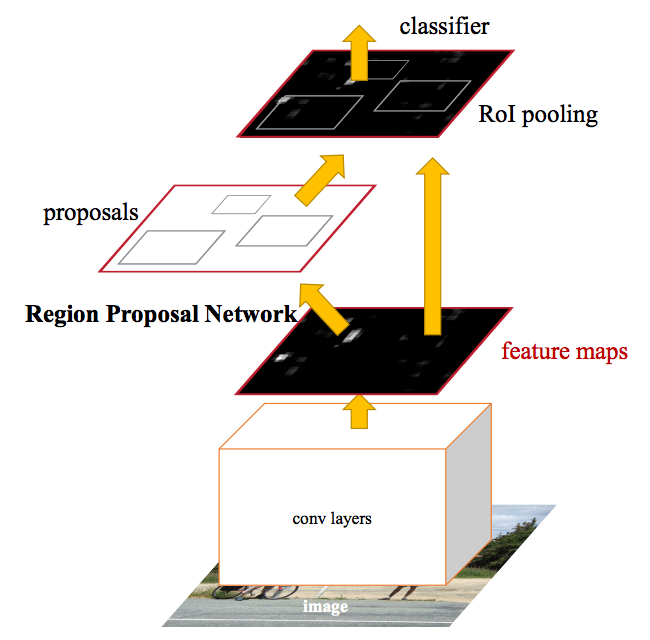

  - k개의 일반적인 비율을 지닌 anchor box를 이용하여 하나의 bounding box 및 score를 이미지의 위치별로 출력

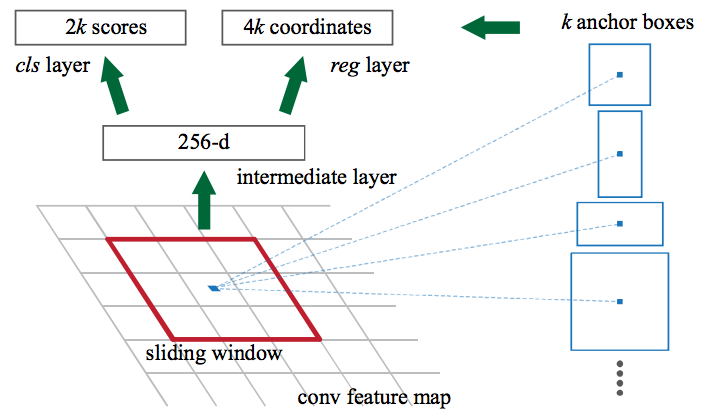

* Mask R-CNN: https://arxiv.org/abs/1703.06870
  - Pixel 레벨의 세그멘테이션
  - RolPool에서 선택된 feature map이 원래 이미지 영역으로 약간 잘못된 정렬이 발생한 부분을 RolAlign을 통해 조정하여 정확하게 정렬
  - Mask R-CNN은 Mask가 생성되면, Faster R-CNN으로 생성된 classification과 bounding box들을 합쳐 정확한 세그멘테이션 가능


# U-Net 기반 세그멘테이션

- 사용된 모델은 수정된 U-Net(https://arxiv.org/abs/1505.04597)
- U-Net이라 불리는 인코더(다운샘플링)와 디코더(업샘플링)를 포함한 구조는 정교한 픽셀 단위의 segmentation이 요구되는 biomedical image segmentation task의 핵심 요소
- Encoder-decoder 구조 또한 semantic segmentation을 위한 CNN 구조로 자주 활용
- Encoder 부분에서는 점진적으로 spatial dimension을 줄여가면서 고차원의 semantic 정보를 convolution filter가 추출해낼 수 있게 함
- Decoder 부분에서는 encoder에서 spatial dimension 축소로 인해 손실된 spatial 정보를 점진적으로 복원하여 보다 정교한 boundary segmentation을 완성
- U-Net은 기본적인 encoder-decoder 구조와 달리 Spatial 정보를 복원하는 과정에서 이전 encoder feature map 중 동일한 크기를 지닌 feature map을 가져 와 prior로 활용함으로써 더 정확한 boundary segmentation이 가능하게 함

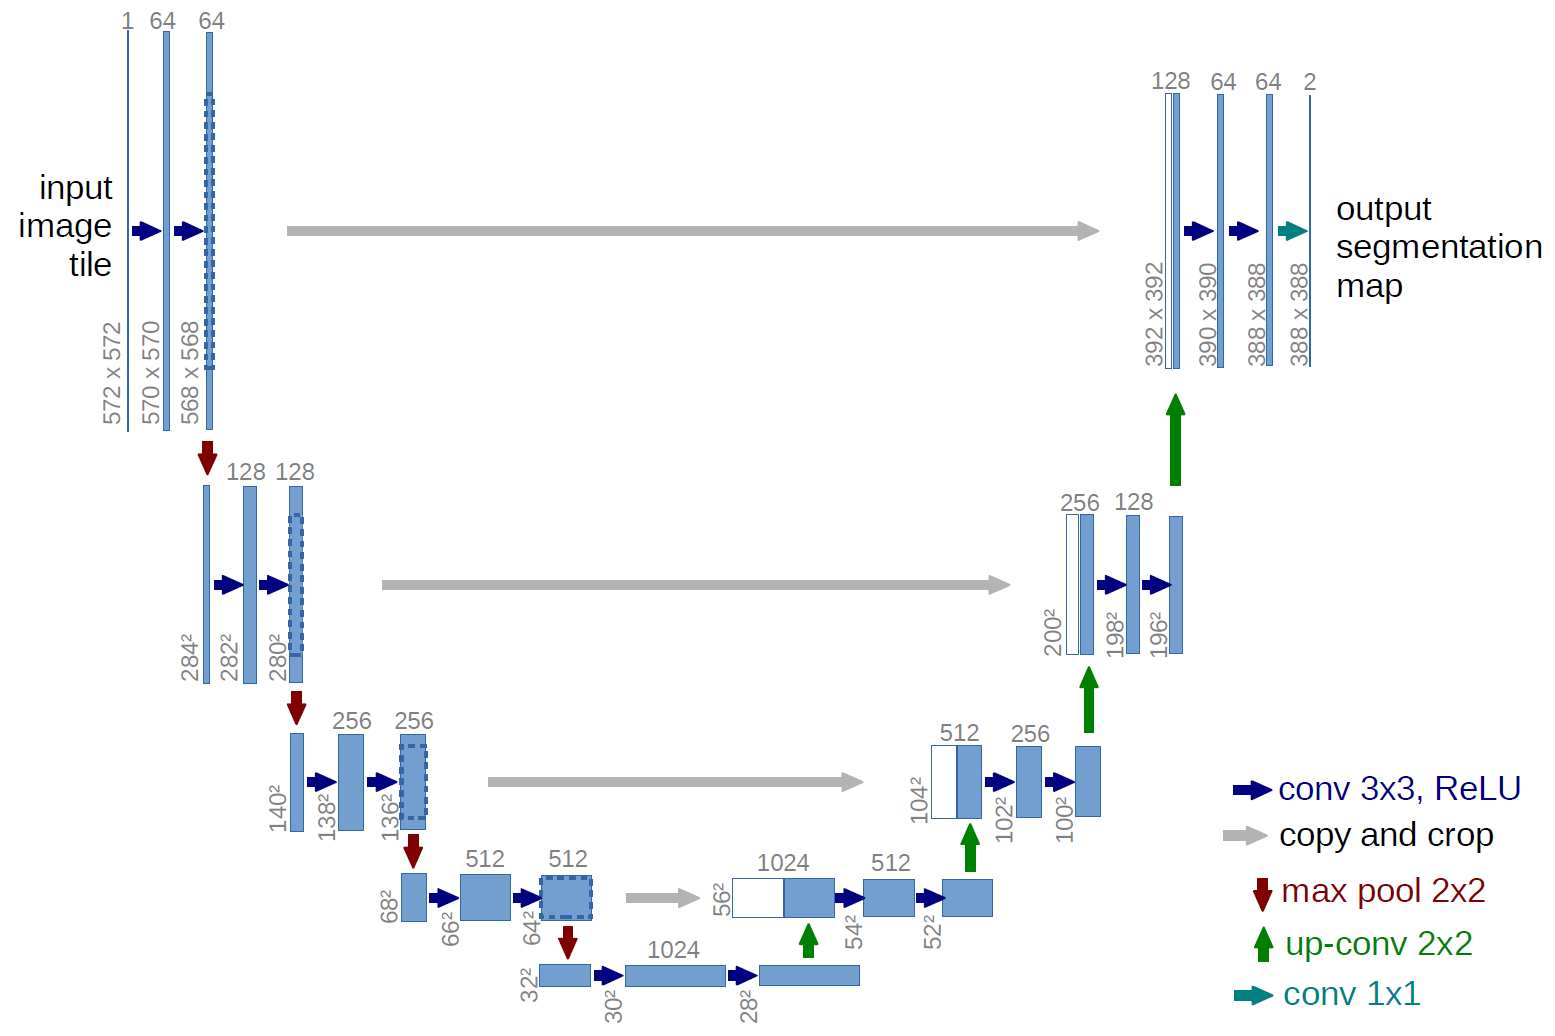

## Oxford-IIIT Pets 데이터셋

- Parkhi *et al*이 만든 [Oxford-IIIT Pet Dataset](https://www.robots.ox.ac.uk/~vgg/data/pets/) 데이터 세트는 영상, 해당 레이블과 픽셀 단위의 마스크로 구성
- 마스크는 기본적으로 각 픽셀의 레이블
- 각 픽셀은 다음 세 가지 범주 중 하나
  *   class 1 : 애완동물이 속한 픽셀
  *   class 2 : 애완동물과 인접한 픽셀
  *   class 3 : 위에 속하지 않는 경우/주변 픽셀

- Images: https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
- Annotations: https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz

In [1]:
!curl -OL  https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
!curl -OL https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   340  100   340    0     0    678      0 --:--:-- --:--:-- --:--:--   678
100  755M  100  755M    0     0  35.0M      0  0:00:21  0:00:21 --:--:-- 36.3M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   345  100   345    0     0    817      0 --:--:-- --:--:-- --:--:--   819
100 18.2M  100 18.2M    0     0  8577k      0  0:00:02  0:00:02 --:--:-- 10.9M


In [2]:
!tar -xf images.tar.gz
!tar -xf annotations.tar.gz

In [3]:
import os
import glob
from IPython.display import Image, display
import random
import keras
from skimage import io
import numpy as np
from keras import layers
from tensorflow.keras.preprocessing.image import load_img
import PIL
from PIL import ImageOps
input_dir = 'images'
target_dir = 'annotations/trimaps'
img_size = (160,160)
num_classes = 3

input_img_paths = sorted(glob.glob('images/*jpg'))
target_img_paths = sorted(glob.glob(f'{target_dir}/*png'))

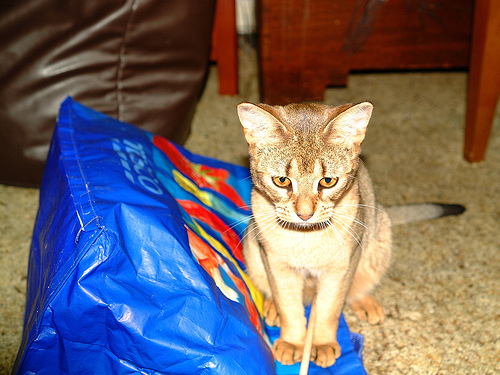

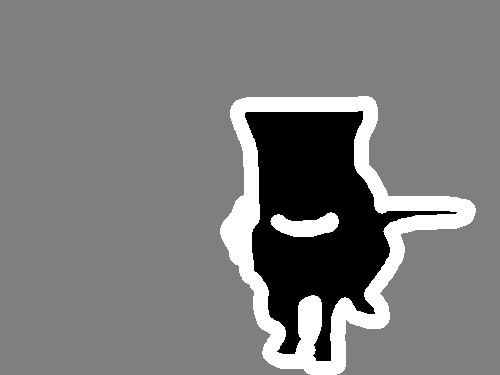

In [4]:
display(Image(filename=input_img_paths[7]))
img = PIL.ImageOps.autocontrast(load_img(target_img_paths[7]))
display(img)

In [5]:
print(io.imread(target_img_paths[7]))
np.unique(io.imread(target_img_paths[7]))

[[2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]


array([1, 2, 3], dtype=uint8)

## 데이터 전처리

In [7]:
class OxfordPets(keras.utils.Sequence):
    def __init__(self, batch_size, img_size, input_img_paths, target_img_paths):
        self.batch_size = batch_size
        self.img_size = img_size
        self.input_img_paths = input_img_paths
        self.target_img_paths = target_img_paths

    def __len__(self): # 몇 개의 배치를 갖고 있는지
        return len(self.target_img_paths)  // self.batch_size

    def __getitem__(self, idx):
        i = idx * self.batch_size
        batch_input_img_paths = self.input_img_paths[i : i+self.batch_size]
        batch_target_img_paths = self.target_img_paths[i : i+self.batch_size]

        x = np.zeros((self.batch_size,) + self.img_size + (3,), dtype='float32')
        for j, path in enumerate(batch_input_img_paths):
            img = load_img(path, target_size=self.img_size)
            x[j] = img

        y = np.zeros((self.batch_size,) + self.img_size + (1,), dtype='uint8')
        for j, path in enumerate(batch_target_img_paths):
            img = load_img(path, target_size=self.img_size, color_mode='grayscale')
            y[j] = np.expand_dims(img, 2)
            y[j] -= 1
        return x, y

In [8]:
val_samples = 1000
batch_size =  32
random.Random(33).shuffle(input_img_paths)
train_input_img_paths = input_img_paths[:-val_samples]
train_target_img_paths = target_img_paths[:-val_samples]

val_input_img_paths = input_img_paths[-val_samples:]
val_target_img_paths = target_img_paths[:-val_samples]

train_gen = OxfordPets(batch_size, img_size, train_input_img_paths, train_target_img_paths)
val_gen = OxfordPets(batch_size, img_size, val_input_img_paths, val_target_img_paths)

## 모델 구성

In [9]:
def get_model(img_size, num_classes):
    inputs = keras.Input(shape=img_size + (3,))

    x = layers.Conv2D(32, 3, strides=2, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    previous_block_activation = x # residual 한 효과

    for filters in [64, 128, 256]:
        x = layers.Activation('relu')(x)
        x = layers.SeparableConv2D(filters, 3, padding='same')(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation('relu')(x)
        x = layers.SeparableConv2D(filters, 3, padding='same')(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPool2D(3, strides=2, padding='same')(x)

        residual = layers.Conv2D(filters, 1, strides=2, padding='same')(previous_block_activation)
        x = layers.add([x, residual])
        previous_block_activation = x

    for filters in [256, 128, 64, 32]:
        x = layers.Activation('relu')(x)
        x = layers.Conv2DTranspose(filters, 3, padding='same')(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation('relu')(x)
        x = layers.Conv2DTranspose(filters, 3, padding='same')(x)
        x = layers.BatchNormalization()(x)

        x = layers.UpSampling2D(2)(x)

        residual = layers.UpSampling2D(2)(previous_block_activation)
        residual = layers.Conv2D(filters, 1, padding='same')(residual)
        x = layers.add([x, residual])
        previous_block_activation = x

    outputs = layers.Conv2D(num_classes, 3, activation='softmax', padding='same')(x)

    model = keras.Model(inputs, outputs)
    return model

model = get_model(img_size, num_classes)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 160, 160, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 80, 80, 32)     │            896 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 80, 80, 32)     │            128 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 80, 80, 32)     │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 80, 80, 32)     │              0 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv2d          │ (None, 80, 80, 64)     │          2,400 │ activation_1[0][0]     │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 80, 80, 64)     │            256 │ separable_conv2d[0][0] │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 80, 80, 64)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv2d_1        │ (None, 80, 80, 64)     │          4,736 │ activation_2[0][0]     │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 80, 80, 64)     │            256 │ separable_conv2d_1[0]… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 40, 40, 64)     │              0 │ batch_normalization_2… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 40, 40, 64)     │          2,112 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 40, 40, 64)     │              0 │ max_pooling2d[0][0],   │
│                           │                        │                │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 40, 40, 64)     │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv2d_2        │ (None, 40, 40, 128)    │          8,896 │ activation_3[0][0]     │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3

 Total params: 2,058,979 (7.85 MB)

 Trainable params: 2,055,203 (7.84 MB)

 Non-trainable params: 3,776 (14.75 KB)

## 모델 학습

In [10]:
model.compile(optimizer='rmsprop', loss = 'sparse_categorical_crossentropy')

callbacks = [keras.callbacks.ModelCheckpoint('oxford_segmentation.keras', save_best_only=True)]

epochs = 20
model.fit(train_gen, epochs=epochs, validation_data = val_gen, callbacks=callbacks)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


199/199 ━━━━━━━━━━━━━━━━━━━━ 76s 222ms/step - loss: 2.4265 - val_loss: 1.0402
Epoch 2/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 52s 259ms/step - loss: 0.7888 - val_loss: 0.8679
Epoch 3/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 42s 207ms/step - loss: 0.7774 - val_loss: 0.8522
Epoch 4/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 41s 201ms/step - loss: 0.7745 - val_loss: 0.7665
Epoch 5/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 83s 208ms/step - loss: 0.7649 - val_loss: 0.7640
Epoch 6/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 82s 207ms/step - loss: 0.7614 - val_loss: 0.7822
Epoch 7/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 42s 206ms/step - loss: 0.7563 - val_loss: 0.7644
Epoch 8/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 42s 206ms/step - loss: 0.7568 - val_loss: 0.7626
Epoch 9/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 83s 210ms/step - loss: 0.7606 - val_loss: 0.7627
Epoch 10/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 42s 207ms/step - loss: 0.7547 - val_loss: 0.7908
Epoch 11/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 42s 205ms/step - loss: 0.7570 - val_loss: 0.8768
Epoch 12/20
199/199 ━━━━━━━━━━

## 추론

199/199 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step


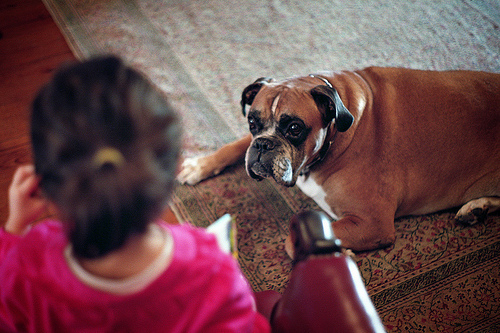

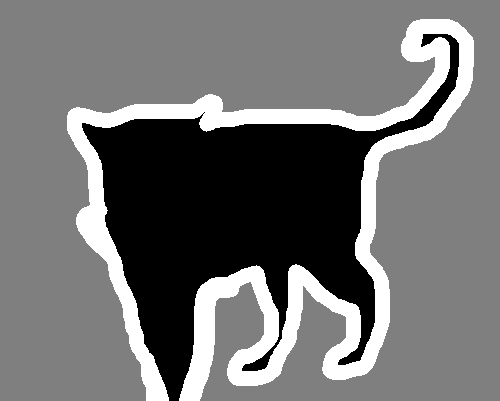

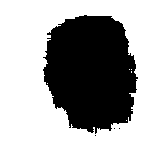

In [12]:
val_preds = model.predict(val_gen)

def display_mask(i):
     # val_preds에서 i번째 예측된 마스크를 가져오고, argmax를 사용해 각 픽셀에서 가장 높은 확률의 클래스를 선택.
    mask = np.argmax(val_preds[i], axis=-1)
    # 차원이 (height, width)로 축소되었으므로, 다시 (height, width, 1)로 차원을 확장.
    mask = np.expand_dims(mask, axis=-1)
    # 마스크 이미지를 auto-contrast 처리해 시각화하기 좋게 변환.
    img = PIL.ImageOps.autocontrast(keras.preprocessing.image.array_to_img(mask))
    # 이미지 출력
    display(img)

i = 20
display(Image(filename=val_input_img_paths[i]))
img = PIL.ImageOps.autocontrast(load_img(val_target_img_paths[i]))
display(img)
display_mask(i)